In [1]:
import pprint

# Data libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Classifiers 
from sklearn.ensemble import RandomForestClassifier

# Analysis libs
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [2]:
malware_data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
malware_data = pd.read_csv(malware_data_filepath)

In [3]:
X_drop_columns = ['Class', 'Category', 'svcscan.interactive_process_services', 'handles.nport', 'pslist.nprocs64bit', 'callbacks.ngeneric']
X = malware_data.drop(columns=X_drop_columns)

y_column = malware_data.Category
class_le = LabelEncoder()
y = class_le.fit_transform(y_column)
y_column.value_counts()

Category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

In [4]:
X

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,0.191489,138,389,221,26,24,116,121,87,0
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,0.127660,138,392,222,26,24,118,122,87,0
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,0.125000,137,395,222,26,27,118,120,88,0
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,0.187500,138,395,222,26,27,118,120,88,0
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,0.217391,138,392,222,26,24,118,124,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,215.486487,1453,39.270270,7973,215.486487,630,2819,...,0.184211,138,389,221,26,24,116,120,86,0
58592,37,14,9.945946,190.216216,1347,36.405405,7038,190.216216,603,2394,...,0.162162,138,389,221,26,24,116,116,88,0
58593,38,15,9.842105,210.026316,1448,38.105263,7982,215.729730,624,2816,...,0.225000,138,389,221,26,24,116,120,88,0
58594,37,15,10.243243,215.513513,1452,39.243243,7974,215.513513,632,2819,...,0.162162,138,389,221,26,24,116,120,87,0


In [5]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41017, 51)
y_train shape: (41017,)
X_test shape: (17579, 51)
y_test shape: (17579,)


In [9]:
rf = RandomForestClassifier(n_estimators=malware_data.shape[1], random_state=42)
# rf = RandomForestClassifier(n_estimators=malware_data.shape[1], random_state=42, max_features=20, max_depth=25, min_samples_leaf=2)
# rf = RandomForestClassifier(n_estimators=X.shape[1], random_state=42)
clf = rf.fit(X_train,y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.9997318185142746
Test accuracy: 0.8724614596962285


In [10]:
y_pred = clf.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"Recall score: {recall_score(y_test, y_pred, average='weighted', zero_division=0)}")
print(f"F-1 score: {f1_score(y_test, y_pred, average='weighted', zero_division=0)}")

Accuracy score: 0.8724614596962285
Precision score: 0.8723322750179154
Recall score: 0.8724614596962285
F-1 score: 0.8723793968898198


In [9]:
# rf = RandomForestClassifier(n_estimators=X.shape[1], random_state=42)
# Training accuracy: 0.9997318185142746
# Test accuracy: 0.8721201433528643

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=15, max_depth=10, min_samples_leaf=4)
# Training accuracy: 0.8424799473389083
# Test accuracy: 0.8286591956311508

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=15, max_depth=15, min_samples_leaf=4)
# Training accuracy: 0.9094521783650682
# Test accuracy: 0.8617099948802549

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=15, max_depth=15, min_samples_leaf=2)
# Training accuracy: 0.9205939000902065
# Test accuracy: 0.864326753512714

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=20, max_depth=15, min_samples_leaf=2)
# Training accuracy: 0.9232757149474609
# Test accuracy: 0.865692018886171

# rf = RandomForestClassifier(n_estimators=150, random_state=42, max_features=20, max_depth=20, min_samples_leaf=2)
# Training accuracy: 0.9699880537338177
# Test accuracy: 0.8768985721599636

# best one here
# rf = RandomForestClassifier(n_estimators=150, random_state=42, max_features=20, max_depth=25, min_samples_leaf=2)
# Training accuracy: 0.9848111758539142
# Test accuracy: 0.8784913817623301



In [10]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[8790,    0,    0,    0],
       [   0, 2162,  382,  393],
       [   0,  276, 2405,  325],
       [   0,  482,  278, 2086]])

In [11]:
clf.classes_

array([0, 1, 2, 3])

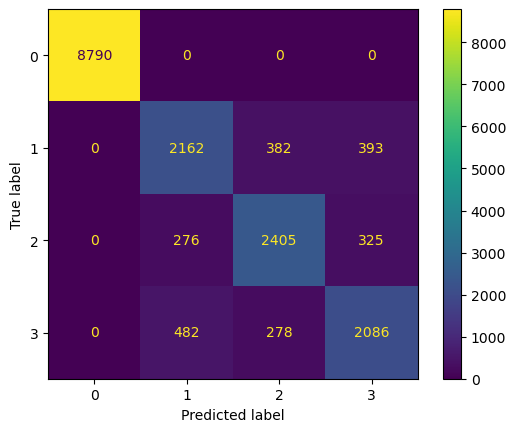

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [13]:
misclassified = np.where(y_test != y_pred)
print(len(misclassified[0]))

2136


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       0.74      0.74      0.74      2937
           2       0.78      0.80      0.79      3006
           3       0.74      0.73      0.74      2846

    accuracy                           0.88     17579
   macro avg       0.82      0.82      0.82     17579
weighted avg       0.88      0.88      0.88     17579



In [15]:
scores = cross_val_score(clf, X, y, cv=10)

In [16]:
print(f"Scores from CV: {scores}")
print(f"Mean of CV scores: {scores.mean()}")
print(f"Standard Deviation of CV scores: {scores.std()}")

Scores from CV: [0.76348123 0.79556314 0.84914676 0.871843   0.87952218 0.86331058
 0.85731353 0.86226318 0.81362007 0.81327872]
Mean of CV scores: 0.8369342401963783
Standard Deviation of CV scores: 0.0362548338910397


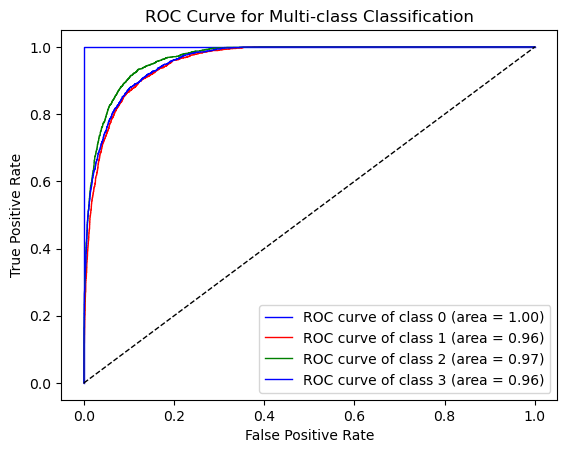

In [17]:
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]


X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=150, random_state=42, max_features=20, max_depth=25, min_samples_leaf=2))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()

### Report and results
In using the model RandomForest, we can see that the model does decently well in this multi classification task. However, we can see with the accuracy, precision, recall, and f1 score is at least 0.87. Now, this is actually a decent score compared to some models as this task is more complex than the binary task. Of course, we can confirm that the model is best in benign classification, but other classes are not as well defined as we look at the ROC graphic. 